# **Plotting Larmor Equation**

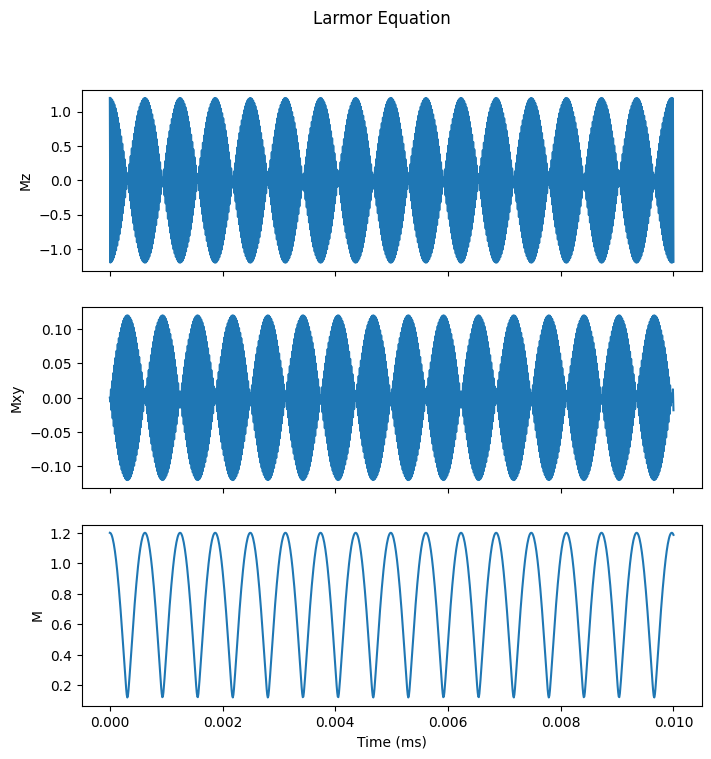

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gamma = 42.58e6  # Gyromagnetic ratio of hydrogen in MRI in Hz/T
B0 = 3.0  # Static magnetic field strength in T
w0 = gamma * B0  # Larmor frequency in Hz

# Define time range
t = np.linspace(0, 0.01, 1000)  # 10 ms with 1000 time points

# Define initial magnetization (Mz) and transverse magnetization (Mxy)
Mz0 = 1.2
Mxy0 = 0.12

# Calculate the Larmor equation solution for Mz and Mxy
Mz = Mz0 * np.cos(w0 * t)
Mxy = Mxy0 * np.sin(w0 * t)

# Calculate the total magnetization (M)
M = np.sqrt(Mz**2 + Mxy**2)

# Plotting results
fig, axs = plt.subplots(3, sharex=True, figsize=(8,8))

axs[0].plot(t, Mz, label='Mz')
axs[0].set_ylabel('Mz')

axs[1].plot(t, Mxy, label='Mxy')
axs[1].set_ylabel('Mxy')

axs[2].plot(t, M, label='M')
axs[2].set_ylabel('M')
axs[2].set_xlabel('Time (ms)')

plt.suptitle('Larmor Equation')
plt.show()

# **Visualization of how  billions of H-atoms go out of sync as time passes.**

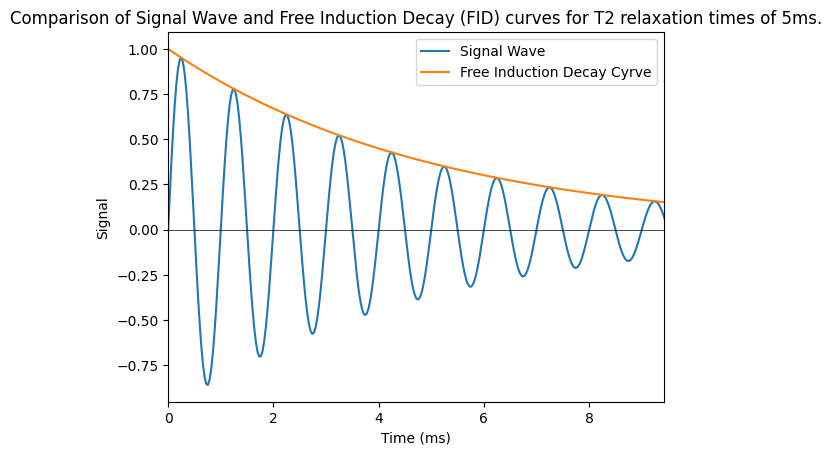

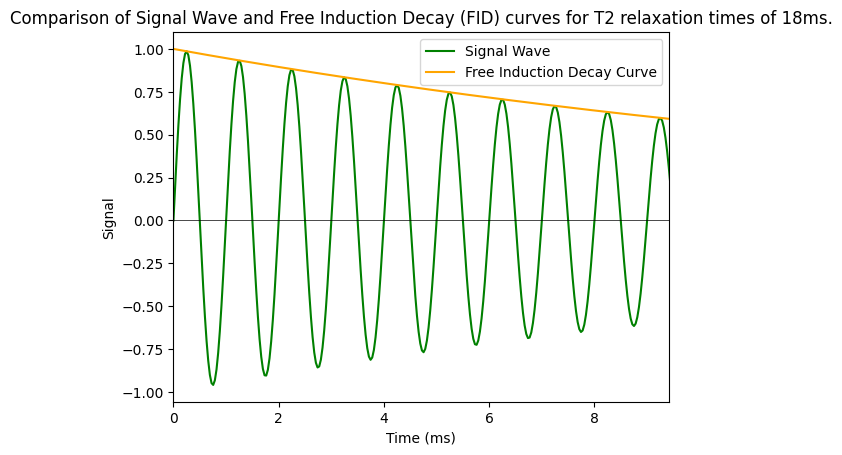

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(0, 5*np.pi, 500) # 5 periods w/ 500 points

# Define amplitude and frequency of the wave
A = 1.0
f = 1.0

# Calculate the signal wave with decreasing amplitude over time
y_sin = A * np.sin(2*np.pi*f*t) * np.exp(-t/5)

# Calculate the einduction decay
y_decay = np.exp(-t/5) 
# CDenoting the  as 0 ant the Aplitude is initially set to one

# Define the x-axis limit
x_min, x_max = 0, 3*np.pi

# Ploting results
plt.plot(t, y_sin, label='Signal Wave')
plt.plot(t, y_decay, label='Free Induction Decay Cyrve')
plt.axhline(y=0, color='black', lw=0.5)
plt.xlim(x_min, x_max)
plt.xlabel('Time (ms)')
plt.ylabel('Signal')
plt.title("Comparison of Signal Wave and Free Induction Decay (FID) curves for T2 relaxation times of 5ms.")
plt.legend()
plt.show()

# Define time range
t = np.linspace(0, 5*np.pi, 500) # 5 periods of the sine wave with 500 points

# Define amplitude and frequency of the sine wave
A = 1.0
f = 1.0

# Calculate the sin wave with decreasing amplitude over time
y_sin = A * np.sin(2*np.pi*f*t) * np.exp(-t/18)

# Calculate the exponential decay
y_decay = A * np.exp(-t/18)

# Define the x-axis limit
x_min, x_max = 0, 3*np.pi

# Plot the results
plt.plot(t, y_sin, label='Signal Wave', color = 'green')
plt.plot(t, y_decay, label='Free Induction Decay Curve', color = 'orange')
plt.axhline(y=0, color='black', lw=0.5) # Add black x-axis
plt.xlim(x_min, x_max) # Set x-axis limit
plt.xlabel('Time (ms)')
plt.ylabel('Signal')
plt.title("Comparison of Signal Wave and Free Induction Decay (FID) curves for T2 relaxation times of 18ms.")

plt.legend()
plt.show()

# **Modeling how Image quality scales with increasisng Magnetic Field Strength**

Correlation: 0.90
Mean: 0.85


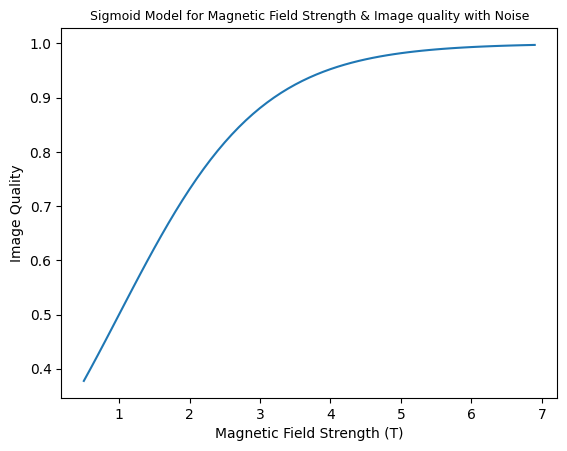

In [33]:
# Sigmoid model without noise
import matplotlib.pyplot as plt
import numpy as np


def sigmoid_model_with_noise(num_trials=100, magnetic_field_range=(0.5, 7.0, 0.1), noise_std=0.0, show_plot=True):
   """Simulate sigmoid model with noise and plot the results
  
   Args:
   - num_trials (int): The number of trials to run (default: 100)
   - magnetic_field_range (tuple): The range of magnetic field strength values (default: (0.5, 7.0, 0.1))
   - noise_std (float): The standard deviation of the noise (default: 0.5)
   - show_plot (bool): Whether to show the resulting plot (default: True)
  
   Returns:
   - tuple: A tuple containing the calculated mean, standard deviation and correlation of the image quality values
  
   """
   # Unpacking the magnetic field range tuple
   magnetic_field_strength = np.arange(*magnetic_field_range)


   # Initializing an array to store the image quality values for each trial
   image_quality = np.zeros((num_trials, len(magnetic_field_strength)))


   # Running the simulation for each trial
   for i in range(num_trials):
       # Setting the image quality values for this trial
       image_quality[i] = 1 / (1 + np.exp(-magnetic_field_strength + 1))


       # Adding noise to the image quality values
       image_quality[i] += np.random.normal(0, noise_std, size=len(magnetic_field_strength))


   # Calculating the mean and standard deviation of the image quality values across all trials
   image_quality_mean = np.mean(image_quality, axis=0)
   image_quality_std = np.std(image_quality, axis=0)


   # Calculating the correlation between magnetic field strength and image quality
   correlation = np.corrcoef(magnetic_field_strength, image_quality_mean)[0, 1]


   # Printing the results
   print(f'Correlation: {correlation:.2f}')
   print(f'Mean: {np.mean(image_quality_mean):.2f}')
   print
   (f'Standard Deviation: {np.mean(image_quality_std):.2f}')


   # Plotting the data
   if show_plot:
       plt.plot(magnetic_field_strength, image_quality_mean)
       plt.xlabel('Magnetic Field Strength (T)')
       plt.ylabel('Image Quality')
       plt.title('Sigmoid Model for Magnetic Field Strength & Image quality with Noise', fontsize=9)
       plt.show()


   return image_quality_mean, image_quality_std, correlation
image_quality_mean, image_quality_std, correlation = sigmoid_model_with_noise(num_trials=100, magnetic_field_range=(0.5, 7.0, 0.1), noise_std=0.0, show_plot=True)



Correlation: 0.86
Mean: 0.84


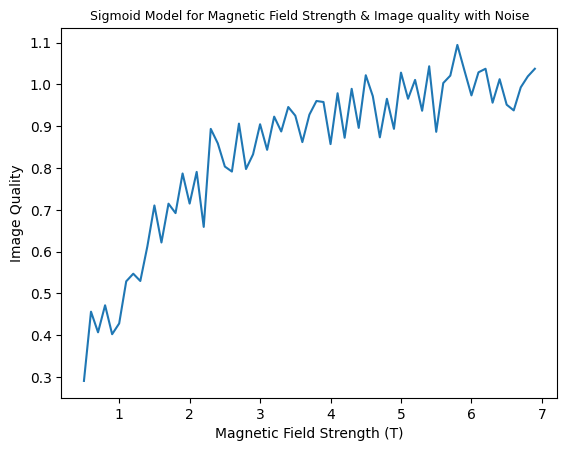

In [34]:
# Sigmoid model with noise
# Noise_std = 0.5 (50% of inital signal intensity)
image_quality_mean, image_quality_std, correlation = sigmoid_model_with_noise(num_trials=100, magnetic_field_range=(0.5, 7.0, 0.1), noise_std=0.5, show_plot=True)

Correlation: 0.83
Mean: 0.83
Standard deviation: 0.18


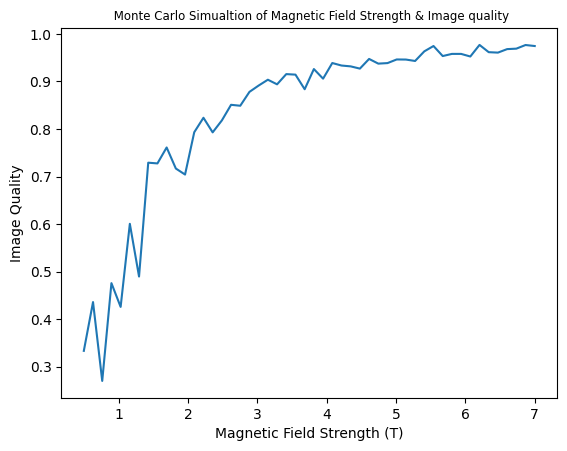

In [35]:
# Monte Carlo Simulation
import numpy as np
import matplotlib.pyplot as plt


# Defining the range of magnetic field strengths to simulate
min_field_strength = 0.5
max_field_strength = 7.0
num_field_strengths = 50
field_strengths = np.linspace(min_field_strength, max_field_strength, num=num_field_strengths)


# Defining the parameters for the simulation
num_samples = 100
mean_signal = 10
std_noise = 0.5
correlation_coefficient = 0.8


# Creating an empty array to store the image qualities for each magnetic field strength
image_qualities = np.zeros(num_field_strengths)


# Simulating the MRI for each magnetic field strength
for i, field_strength in enumerate(field_strengths):
   # Generating a signal with a linearly increasing intensity
   signal = np.linspace(0, field_strength, num_samples)
   # Adding Gaussian noise to the signal
   noise = np.random.normal(scale=std_noise, size=num_samples)
   noisy_signal = signal + noise
   # Calculating the image quality as the correlation between the signal and the noisy signal
   image_quality = np.corrcoef(signal, noisy_signal)[0, 1]
   image_qualities[i] = image_quality


# Calculating the mean, correlation coefficient, and standard deviation
mean_image_quality = np.mean(image_qualities)
corr_coefficient = np.corrcoef(field_strengths, image_qualities)[0, 1]
std_image_quality = np.std(image_qualities)


print(f"Correlation: {corr_coefficient:.2f}")
print(f"Mean: {mean_image_quality:.2f}")
print(f"Standard deviation: {std_image_quality:.2f}")


# Plotting the results
plt.plot(field_strengths, image_qualities)
plt.xlabel('Magnetic Field Strength (T)')
plt.ylabel('Image Quality')
plt.title(' Monte Carlo Simualtion of Magnetic Field Strength & Image quality', fontsize=8.5)
plt.show()